In [1]:
import torch
import torch.nn as nn

In [6]:
class ResidualBlock(nn.Module):
  def __init__(self, input_channels = None, output_dimension = None):
    super().__init__()

    self.CONV_LAYER = self.conv_block(input_channel = input_channels, output_channel = 16, dropout = 0.1)
    self.RES_BLOCK  = self.residual_block(input_channel = input_channels, output_channel = 16, dropout = 0.1)
    self.FC_LAYER   = self.fc_block(input_features = 10 * 10 * 8 + 20 * 20 * 16, output_features = 512, dropout = 0.1)

  def residual_block(self, input_channel = None, output_channel = None, dropout = None):
        return nn.Sequential(
        nn.Conv2d(in_channels = input_channel,\
                  out_channels = output_channel,\
                  kernel_size = (3, 3),\
                  stride = (1, 1),
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (2, 2),\
                     stride = (2, 2)),
        nn.Dropout(p = dropout)

        )
  def conv_block(self, input_channel = None, output_channel = None, dropout = None):
    return nn.Sequential(
        nn.Conv2d(in_channels = input_channel,\
                  out_channels = output_channel,\
                  kernel_size = (3, 3),\
                  stride = (1, 1),
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (2, 2),\
                     stride = (2, 2)),
        nn.Dropout(p = dropout),

        nn.Conv2d(in_channels = 16,\
                  out_channels = 8,\
                  kernel_size = (3, 3),\
                  stride = (1, 1),
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (2, 2),\
                     stride = (2, 2)),
        nn.Dropout(p = dropout)
    )
  def fc_block(self, input_features = None, output_features = None, dropout = None):
    return nn.Sequential(
        nn.Linear(in_features = input_features,\
                  out_features = output_features),
        nn.ReLU(),

        nn.Linear(in_features = 512,\
                  out_features = 4),
        nn.Softmax()
    )

  def forward(self, x):
    CONV1 = self.CONV_LAYER(x)

    CONV1 = CONV1.reshape(CONV1.shape[0], -1)

    RESIDUAL = self.RES_BLOCK(x)

    RESIDUAL = RESIDUAL.reshape(RESIDUAL.shape[0], -1)

    CONCAT = torch.concat((CONV1, RESIDUAL), dim = 1)

    FC = self.FC_LAYER(CONCAT)

    return FC

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'çpu')
device

device(type='cuda')

In [7]:
model = ResidualBlock(3, 4)
model = model.to(device)

In [8]:
model.parameters

<bound method Module.parameters of ResidualBlock(
  (CONV_LAYER): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.1, inplace=False)
  )
  (RES_BLOCK): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.1, inplace=False)
  )
  (FC_LAYER): Sequential(
    (0): Linear(in_features=7200, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=4, bias=True)
    (3): Softmax(dim=None)
  )
)>

In [10]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=865b78d91e0c756a6d0603f5957b93a1a0386409c78c33c1f8fd5bbcd12f84a7
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [12]:
dummy_data = torch.randn(16, 3, 40, 40)
dummy_data = dummy_data.to(device)
S = model(dummy_data)
S.shape

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


torch.Size([16, 4])

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


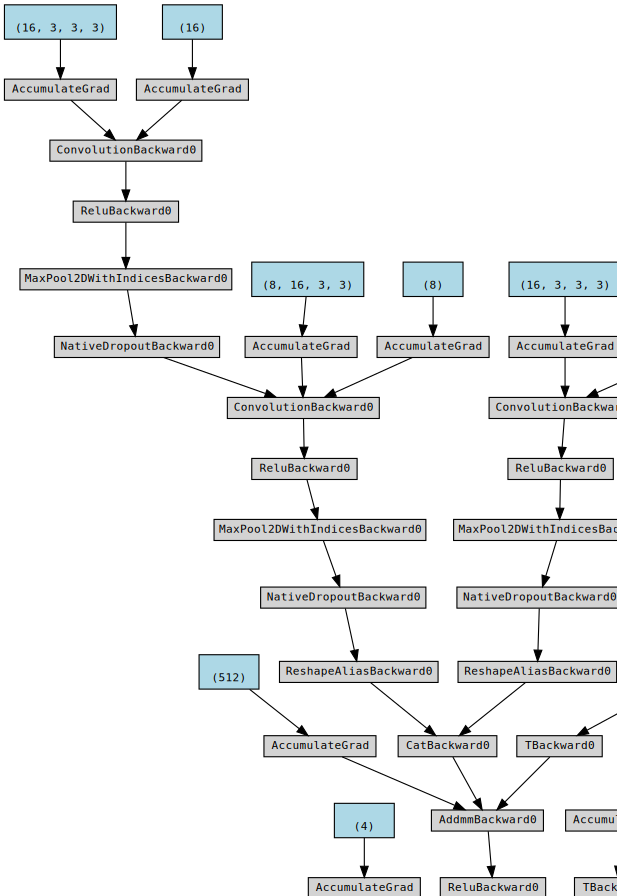

In [14]:
# Import the library
from torchviz import make_dot

make_dot(model(dummy_data),\
         show_attrs = False)